In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Kiran\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ama = pd.read_csv('amazon_co-ecommerce_sample.csv')

In [3]:
# Checking the info of data. Through this info we came to know, data consist of 10000 observation and 17 variables or features.
ama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [4]:
ama.head(5)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [5]:
ama['price']

0        £3.42
1       £16.99
2        £9.99
3       £39.99
4       £32.19
         ...  
9995    £22.95
9996    £39.99
9997    £43.99
9998    £49.81
9999    £21.20
Name: price, Length: 10000, dtype: object

In [6]:
new_price= ama.price.str.replace('£','')
new_price

0        3.42
1       16.99
2        9.99
3       39.99
4       32.19
        ...  
9995    22.95
9996    39.99
9997    43.99
9998    49.81
9999    21.20
Name: price, Length: 10000, dtype: object

In [7]:
ama['price'].str.split('-',n=1,expand=True)

,0,1
0,£3.42,None
1,£16.99,None
2,£9.99,None
3,£39.99,None
4,£32.19,None
...,...,...
9995,£22.95,None
9996,£39.99,None
9997,£43.99,None
9998,£49.81,None


In [8]:
xy = new_price.str.split('-',n=1,expand=True)
xy

,0,1
0,3.42,None
1,16.99,None
2,9.99,None
3,39.99,None
4,32.19,None
...,...,...
9995,22.95,None
9996,39.99,None
9997,43.99,None
9998,49.81,None


In [9]:
price1 =new_price.str.replace(',','')
price1

0        3.42
1       16.99
2        9.99
3       39.99
4       32.19
        ...  
9995    22.95
9996    39.99
9997    43.99
9998    49.81
9999    21.20
Name: price, Length: 10000, dtype: object

In [10]:
clean_price = price1.str.split('-',n=1,expand=True).astype(float)
clean_price

,0,1
0,3.42,NaN
1,16.99,NaN
2,9.99,NaN
3,39.99,NaN
4,32.19,NaN
...,...,...
9995,22.95,NaN
9996,39.99,NaN
9997,43.99,NaN
9998,49.81,NaN


In [11]:
clean_price.mean()

0     20.278110
1    984.401667
dtype: float64

In [31]:
ama['clean_price']= price1.str.split('-',n=1,expand=True).astype(float)

In [32]:
ama.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,new_avg_review_rating,new_num_reviews,clean_price
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",4.9,15.0,3.42
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",4.5,2.0,16.99
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",3.9,17.0,9.99
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,5.0,1.0,39.99
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,4.7,3.0,32.19


In [13]:
ama.number_available_in_stock.str.replace('new','')

0        5 
1       NaN
2        2 
3       NaN
4       NaN
       ... 
9995     5 
9996    NaN
9997     3 
9998     3 
9999    31 
Name: number_available_in_stock, Length: 10000, dtype: object

In [14]:
ama.number_available_in_stock.str.replace('new','')

0        5 
1       NaN
2        2 
3       NaN
4       NaN
       ... 
9995     5 
9996    NaN
9997     3 
9998     3 
9999    31 
Name: number_available_in_stock, Length: 10000, dtype: object

In [15]:
ama['average_review_rating'].str.replace('out of 5 stars','').astype(float)

0       4.9
1       4.5
2       3.9
3       5.0
4       4.7
       ... 
9995    5.0
9996    4.0
9997    5.0
9998    5.0
9999    4.5
Name: average_review_rating, Length: 10000, dtype: float64

In [16]:
ama.number_of_reviews.str.replace(',','').astype(float) 

0       15.0
1        2.0
2       17.0
3        1.0
4        3.0
        ... 
9995     3.0
9996     1.0
9997     1.0
9998     1.0
9999    11.0
Name: number_of_reviews, Length: 10000, dtype: float64

In [20]:
# changing the new_avg_review_rating into float
ama['new_avg_review_rating']= ama['average_review_rating'].str.replace('out of 5 stars','').astype(float)

In [21]:
# Assigning number of reviews to new_num_reviews
ama['new_num_reviews']= ama.number_of_reviews.str.replace(',','').astype(float) 

In [22]:
# Grabing only customer_reviews
import re
re.findall(r'((?:\d)\.\d+(?=\s))',ama.customer_reviews.iloc[1])

['4.0', '5.0']

In [23]:
re.findall(r'((?:\d)\.\d+(?=\s))',ama.customer_reviews.iloc[1])[0]

'4.0'

In [142]:
ama.customer_reviews.iloc[0]

"Worth Buying For The Pictures Alone (As Ever) // 4.0 // 6 April 2014 // By\n    \n    Copnovelist\n  \n on 6 April 2014 // Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. | Amazing detail fabulous photography. // 5.0 // 11 April 2015 // By\n    \n    richard\n  \n on 11 April 2015 // Amazing detail, every credit to the photographer in this book, a worthy reference manual, as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. | 'Great Purchase' // 5.0 // 23 April 2014 // By\n  

In [ ]:
ama

In [39]:
ama.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,new_avg_review_rating,new_num_reviews,clean_price
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",4.9,15.0,3.42
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",4.5,2.0,16.99
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",3.9,17.0,9.99
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,5.0,1.0,39.99
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,4.7,3.0,32.19


In [46]:
new1 = ama['number_available_in_stock'].str.replace('new','')
new1

0        5 
1       NaN
2        2 
3       NaN
4       NaN
       ... 
9995     5 
9996    NaN
9997     3 
9998     3 
9999    31 
Name: number_available_in_stock, Length: 10000, dtype: object

In [55]:
new2 = new1.str.replace('used','')
new2

0        5 
1       NaN
2        2 
3       NaN
4       NaN
       ... 
9995     5 
9996    NaN
9997     3 
9998     3 
9999    31 
Name: number_available_in_stock, Length: 10000, dtype: object

In [59]:
new3 = new2.str.replace('collectible','')
new3

0        5 
1       NaN
2        2 
3       NaN
4       NaN
       ... 
9995     5 
9996    NaN
9997     3 
9998     3 
9999    31 
Name: number_available_in_stock, Length: 10000, dtype: object

In [62]:
new4 = new3.str.replace('refurbished','')
new4

0        5 
1       NaN
2        2 
3       NaN
4       NaN
       ... 
9995     5 
9996    NaN
9997     3 
9998     3 
9999    31 
Name: number_available_in_stock, Length: 10000, dtype: object

In [63]:
new4.astype(float)

0        5.0
1        NaN
2        2.0
3        NaN
4        NaN
        ... 
9995     5.0
9996     NaN
9997     3.0
9998     3.0
9999    31.0
Name: number_available_in_stock, Length: 10000, dtype: float64

In [68]:
ama['number_available_in_stock'].str.replace('new','').str.replace('used','').str.replace('collectible','').str.replace('refurbished','').astype(float)

0        5.0
1        NaN
2        2.0
3        NaN
4        NaN
        ... 
9995     5.0
9996     NaN
9997     3.0
9998     3.0
9999    31.0
Name: number_available_in_stock, Length: 10000, dtype: float64

In [70]:
ama['new_available_stock']= ama['number_available_in_stock'].str.replace('new','').str.replace('used','').str.replace('collectible','').str.replace('refurbished','').astype(float)

In [71]:
ama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [72]:
ama.describe()

,number_of_answered_questions,new_avg_review_rating,new_num_reviews,clean_price,new_available_stock
count,9235.000000,9982.000000,9982.000000,8565.000000,7500.000000
mean,1.834976,4.707283,9.139952,20.278110,7.916933
std,2.517268,0.372279,33.728145,46.345557,8.805777
min,1.000000,2.300000,1.000000,0.010000,1.000000
25%,1.000000,4.500000,1.000000,4.990000,3.000000
50%,1.000000,5.000000,2.000000,10.620000,5.000000
75%,2.000000,5.000000,6.000000,19.990000,10.000000
max,39.000000,5.000000,1399.000000,2439.920000,92.000000


# Checking the null values of our data sets.

In [73]:
ama.isnull().sum().sort_values(ascending= False)

customer_questions_and_answers                 9086
sellers                                        3082
items_customers_buy_after_viewing_this_item    3065
new_available_stock                            2500
number_available_in_stock                      2500
clean_price                                    1435
price                                          1435
customers_who_bought_this_item_also_bought     1062
number_of_answered_questions                    765
amazon_category_and_sub_category                690
description                                     651
product_description                             651
product_information                              58
customer_reviews                                 21
average_review_rating                            18
number_of_reviews                                18
new_avg_review_rating                            18
new_num_reviews                                  18
manufacturer                                      7
product_name

# As we can see some of the features has more than 90% data are missing. For those columns we have decided to drope it. Any columns whose datas are missing more than 50%, we have decided to drope it. 

In [74]:
missing_data = (ama.isnull().sum()/ len(ama)) *100
missing_data.sort_values(ascending = False)

customer_questions_and_answers                 90.86
sellers                                        30.82
items_customers_buy_after_viewing_this_item    30.65
new_available_stock                            25.00
number_available_in_stock                      25.00
clean_price                                    14.35
price                                          14.35
customers_who_bought_this_item_also_bought     10.62
number_of_answered_questions                    7.65
amazon_category_and_sub_category                6.90
description                                     6.51
product_description                             6.51
product_information                             0.58
customer_reviews                                0.21
average_review_rating                           0.18
number_of_reviews                               0.18
new_avg_review_rating                           0.18
new_num_reviews                                 0.18
manufacturer                                  

In [77]:
ama1 = ama.drop(['price','number_of_reviews','average_review_rating','number_available_in_stock'], axis = 1)

In [78]:
ama1.head()

,uniq_id,product_name,manufacturer,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,new_avg_review_rating,new_num_reviews,clean_price,new_available_stock
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",4.9,15.0,3.42,5.0
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",4.5,2.0,16.99,NaN
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",3.9,17.0,9.99,2.0
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,5.0,1.0,39.99,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,4.7,3.0,32.19,NaN


In [79]:
ama1.columns

Index(['uniq_id', 'product_name', 'manufacturer',
       'number_of_answered_questions', 'amazon_category_and_sub_category',
       'customers_who_bought_this_item_also_bought', 'description',
       'product_information', 'product_description',
       'items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers', 'customer_reviews', 'sellers',
       'new_avg_review_rating', 'new_num_reviews', 'clean_price',
       'new_available_stock'],
      dtype='object')

In [81]:
ama1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   number_of_answered_questions                 9235 non-null   float64
 4   amazon_category_and_sub_category             9310 non-null   object 
 5   customers_who_bought_this_item_also_bought   8938 non-null   object 
 6   description                                  9349 non-null   object 
 7   product_information                          9942 non-null   object 
 8   product_description                          9349 non-null   object 
 9   items_customers_buy_after_viewing_this_item  6935 non-null   object 
 10 

In [80]:
missing_data1 = (ama1.isnull().sum()/ len(ama1)) *100
missing_data1.sort_values(ascending = False)

customer_questions_and_answers                 90.86
sellers                                        30.82
items_customers_buy_after_viewing_this_item    30.65
new_available_stock                            25.00
clean_price                                    14.35
customers_who_bought_this_item_also_bought     10.62
number_of_answered_questions                    7.65
amazon_category_and_sub_category                6.90
description                                     6.51
product_description                             6.51
product_information                             0.58
customer_reviews                                0.21
new_avg_review_rating                           0.18
new_num_reviews                                 0.18
manufacturer                                    0.07
product_name                                    0.00
uniq_id                                         0.00
dtype: float64

In [82]:
missing_data1[missing_data1> 0].sort_values(ascending= False)

customer_questions_and_answers                 90.86
sellers                                        30.82
items_customers_buy_after_viewing_this_item    30.65
new_available_stock                            25.00
clean_price                                    14.35
customers_who_bought_this_item_also_bought     10.62
number_of_answered_questions                    7.65
amazon_category_and_sub_category                6.90
product_description                             6.51
description                                     6.51
product_information                             0.58
customer_reviews                                0.21
new_num_reviews                                 0.18
new_avg_review_rating                           0.18
manufacturer                                    0.07
dtype: float64

# Lets plot all the missing values in heatmap.

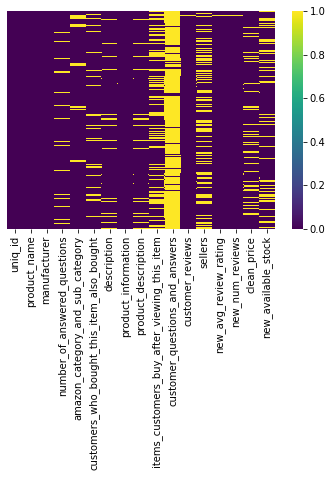

In [84]:
sns.heatmap(ama1.isnull(), yticklabels = False, cmap = 'viridis')

In [86]:
ama1['manufacturer'].nunique()

2651

- Checking all the nan values on manufacturer columns. There are 7 missing values in manufacturer columns, as we can see below.

In [91]:
ama1[ama1.manufacturer.isnull()]

,uniq_id,product_name,manufacturer,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,new_avg_review_rating,new_num_reviews,clean_price,new_available_stock
1307,7acd16900b9cb4f8c1988c2cb823becd,Trendy Bead Tattoos (Packaging May Vary),NaN,11.0,NaN,http://www.amazon.co.uk/Style-Chalk-Multi-Crea...,Trendy Bead Tattoos,NaN,Trendy Bead Tattoos,http://www.amazon.co.uk/Style-me-up-53706-Tatt...,NaN,Would recommend. // 5.0 // 28 Jan. 2015 // By\...,"{""seller""=>[{""Seller_name_1""=>""Innovation Home...",5.0,1.0,NaN,NaN
1592,e7994dbee9b6fdb454488724bef2f7e2,3D Butterfly Stickers Fly - Assorted Colours,NaN,4.0,Arts & Crafts > Paper & Stickers,http://www.amazon.co.uk/Peterkin-Butterflies |...,NaN,Technical Details Manufacturer recommended age...,NaN,NaN,NaN,beautiful // 5.0 // 15 Aug. 2012 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""The Online Stor...",5.0,2.0,2.14,5.0
4466,1eb8f654c5687388b4296890e65c9d7d,GREEN SEA TURTLE Plush Soft Toy - 32cm,NaN,1.0,NaN,http://www.amazon.co.uk/National-Geographic | ...,Cute and cuddly green turtle soft toy. Attenti...,Technical Details Item Weight200 g Product Dim...,Cute and cuddly green turtle soft toy. Attenti...,http://www.amazon.co.uk/Melissa-Doug-Sea-Turtl...,NaN,A great present! // 5.0 // 15 Nov. 2013 // By\...,"{""seller""=>[{""Seller_name_1""=>""Blyme"", ""Seller...",4.8,12.0,10.99,3.0
4834,da874101badfa98ab3c76548111cfb13,Disney FROZEN Enchanted Moments Sticker Collec...,NaN,2.0,Hobbies > Trading Cards & Accessories > Sticke...,http://www.amazon.co.uk/Disney-Frozen-enchante...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/packets-Panini-Enchant...,NaN,Five Stars // 5.0 // 30 Dec. 2014 // By\n \...,NaN,4.0,2.0,45.59,2.0
5561,a73496640ea6da23dcb49c3b71e05cef,Match Attax 2014/2015 Liverpool 17 Base 14/15 ...,NaN,1.0,Hobbies > Trading Cards & Accessories > Packs ...,http://www.amazon.co.uk/Match-Attax-2014-Liver...,NaN,Technical Details Item Weight9 g Product Dimen...,NaN,NaN,Do you get 100 club for free // No 100 club...,Four Stars // 4.0 // 21 Jan. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""Football Card S...",4.8,4.0,3.54,6.0
9445,a4f4cdbf12552a95083352dd9e4abf1b,Gibsons Pass the Pud Family Game with AmazonBa...,NaN,4.0,NaN,http://www.amazon.co.uk/Gibsons-Games-62469-Pa...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Gibsons-Games-62469-Pa...,"Could you adapt the gameplay for 3 players, or...",Perfect after-Christmas Dinner game // 5.0 // ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",4.0,202.0,21.71,NaN
9628,7ed9421489b9763792060164f39444e8,Assortment of Hama Multi beads Pale x1000,NaN,NaN,Arts & Crafts > Children's Craft Kits > Bead A...,http://www.amazon.co.uk/Hama-Beads-Neon-Colour...,Assortment of Hama beads (beads to iron).Instr...,Technical Details Item Weight68 g Manufacturer...,Assortment of Hama beads (beads to iron).Instr...,http://www.amazon.co.uk/Hama-Beads-Pastel-Colo...,NaN,Five Stars // 5.0 // 10 Feb. 2015 // By\n \...,NaN,5.0,1.0,NaN,1.0


- Droping those rows with missing values, so from this colimns we will be droping 7 rows, which consist of 0.07% data. It will not gonna impact our data that much. So its okay to drop this rows.

In [94]:
ama1.dropna(subset=['manufacturer'], how='any', inplace= True)

In [95]:
ama1[ama1.manufacturer.isnull()]

,uniq_id,product_name,manufacturer,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,new_avg_review_rating,new_num_reviews,clean_price,new_available_stock


In [127]:
ama1.groupby('manufacturer')['clean_price'].mean().tail(10)

manufacturer
ukgiftstoreonline            6.990000
unbespielt                  17.900000
uni-ball                     1.970000
unisex party bag fillers     0.600000
universal hobby             17.113582
woooow doll                 19.990000
xs-party                     1.490000
yugioh                       8.072500
zizzi                       13.245000
|MFG                         4.990000
Name: clean_price, dtype: float64

- Fillin the nan values on price columns. In our data sets nearly 15% of values in price columns are missing. For this analysis we are using mean methods to fill the missing price. 

In [107]:
ama1['clean_price'].fillna(ama1['clean_price'].mean(),inplace= True)

- In our data sets customer questions and answers has 90% missing values. So we decided to drop this columns as a whole.

In [112]:
ama1.drop(['customer_questions_and_answers'], axis= 1, inplace= True)

- Number of answered question has over 7% missing values. To fill this missing values we are using mean values.

In [115]:
ama1['number_of_answered_questions'].fillna(ama1['number_of_answered_questions'].mean(),inplace= True)

- For amazon_category_and_sub_category we are using mode function to fill our missing data.

In [123]:
ama1['amazon_category_and_sub_category'].value_counts()

Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles              1567
Figures & Playsets > Science Fiction & Fantasy                                                485
Arts & Crafts > Children's Craft Kits > Bead Art & Jewellery-Making                           367
Characters & Brands > Disney > Toys                                                           347
Hobbies > Trading Cards & Accessories > Packs & Sets                                          316
                                                                                             ... 
Indoor Lighting > Specialty & Decorative Lighting > Book Lights                                 1
Pens, Pencils & Writing Supplies > Erasers & Correction Supplies > Correction Pens              1
Games > Drinking Games                                                                          1
Laundry, Storage & Organisation > Baskets & Bins > Storage Boxes & Chests > Storage Boxes       1
Home Accessories > S

In [121]:
ama1['amazon_category_and_sub_category'].fillna(ama1['amazon_category_and_sub_category'].mode()[0], inplace= True)

In [124]:
ama1['customers_who_bought_this_item_also_bought'].value_counts()

http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric                                                                                                                                                                                                                                                                           60
http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers                                                                                                                                                                                                                                                               26
http://www.amazon.co.u

In [125]:
ama1['customers_who_bought_this_item_also_bought'].fillna(ama1['customers_who_bought_this_item_also_bought'].mode()[0], inplace= True)

In [130]:
ama1[ama1.description.isnull()]

,uniq_id,product_name,manufacturer,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,sellers,new_avg_review_rating,new_num_reviews,clean_price,new_available_stock
42,d5a8c72773ae4ebb712ffca0054a0461,HIGH SPEED TRAIN BUMP AND GO WITH MUSIC AND LI...,ARSUK,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/harmony-high-speed-tra...,NaN,Technical Details Manufacturer recommended age...,NaN,NaN,"grandchildren love it, but it does tend to go ...","{""seller""=>{""Seller_name_1""=>""Digicorp"", ""Sell...",4.0,1.0,4.990000,NaN
228,16925ac88ed0f52939ec650c367e047d,Pokemon Center Original Doll Pokemon Time Raichu,Pokemon Center,1.0,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Pokemon-Plush-Toy-Raic...,NaN,Technical Details Item Weight145 g Product Dim...,NaN,http://www.amazon.co.uk/Pokemon-Plush-Toy-Raic...,Five Stars // 5.0 // 14 Sept. 2015 // By\n ...,"{""seller""=>[{""Seller_name_1""=>""100WAYS Ship fr...",5.0,1.0,14.690000,32.0
242,a006701c15f12c6a200f48fba57da352,"Disney Phineas and Ferb 8 Ferb Plush, soft, cu...",Disney,2.0,Characters & Brands > Disney > Toys,http://www.amazon.co.uk/10-Inch-Ferb-Plush-Phi...,NaN,Technical Details Item Weight68 g Product Dime...,NaN,http://www.amazon.co.uk/10-Inch-Ferb-Plush-Phi...,my grandson will love it // 5.0 // 17 Nov. 201...,"{""seller""=>[{""Seller_name_1""=>""mum22"", ""Seller...",5.0,1.0,20.280145,2.0
268,7dc340946c58e8571e2002c1dc394e33,Takaratomy Pokemon X and Y XYN-14 Male Meowsti...,Pokémon,1.0,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Pokemon-soft-plush-fig...,NaN,Technical Details Item Weight154 g Product Dim...,NaN,http://www.amazon.co.uk/Pokemon-Center-Plush-D...,Great item! Arrived in excellent condition // ...,NaN,5.0,1.0,11.580000,21.0
343,fa16bd179bf00ce37f8b5455cc8c86e5,Cuddly Soft Spinosaurus Dinosaur Soft Toy Gift...,Ravensden,1.0,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Plush-Brontosaurus | h...,NaN,Technical Details Item Weight222 g Product Dim...,NaN,http://www.amazon.co.uk/Plush-Brontosaurus | h...,"cuddly, cute - my boy loved it // 5.0 // 7 Dec...",NaN,5.0,1.0,14.990000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,fca7110160af8a481fc94e9a9c8a07e3,Star Wars Filled Desk Tidy,Star Wars,3.0,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Star-Comics-Stationery...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Star-Comics-Stationery...,Five Stars // 5.0 // 19 May 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""Toptoys2u Limite...",5.0,1.0,2.890000,NaN
9979,ccfd41e97f866080af3f17bc64120e3d,Albus Dumbledore (Harry Potter Magical Minis C...,Mattel,3.0,Characters & Brands > Harry Potter > Toys,http://www.amazon.co.uk/Scalextric | http://ww...,NaN,Technical Details Item Weight118 g Product Dim...,NaN,NaN,great // 5.0 // 4 Nov. 2013 // By\n \n l...,NaN,5.0,1.0,63.730000,NaN
9989,1fbd746051cc006738435a8d64d1e1d1,"Teen Titans Shape-Shifting Beast Boy 5"" inch F...",Ban Dai,3.0,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Scalextric | http://ww...,NaN,Technical Details Item Weight91 g Product Dime...,NaN,NaN,Five Stars // 5.0 // 21 Nov. 2014 // By\n \...,"{""seller""=>{""Seller_name_1""=>""JIMMYS DROP SHOP...",5.0,1.0,29.990000,NaN
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,3.0,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,... what I see my grandson us going to have fu...,NaN,4.0,1.0,39.990000,NaN


In [131]:
ama1['description'].fillna(ama1['description'].mode()[0], inplace= True)

- Description and product_description has same values are missing, for this we can drop one column or fill both the columns with mode. But for this analysis we have decided to fill both the columns with mode.

In [133]:
ama1['product_description'].fillna(ama1['product_description'].mode()[0],inplace= True)

- For categorical we have used mode to fill this missing value.

In [136]:
ama1['items_customers_buy_after_viewing_this_item'].value_counts()

http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric | http://www.amazon.co.uk/Scalextric                                                                                                                                                                                            38
http://www.amazon.co.uk/Ravensburger | http://www.amazon.co.uk/Ravensburger | http://www.amazon.co.uk/Ravensburger | http://www.amazon.co.uk/Ravensburger                                                                                                                                                                                    26
http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers | http://www.amazon.co.uk/Transformers                                                                                                                                                                               

In [137]:
ama1['items_customers_buy_after_viewing_this_item'].fillna(ama1['items_customers_buy_after_viewing_this_item'].mode()[0],inplace= True)

- For new_available_stock we decided to fill missing values with mean value. If we fill it with mode it might imbalance our data set. So we thought mean is the good way to go.

In [147]:
ama1['new_available_stock'].fillna(ama1['new_available_stock'].mean(), inplace= True)

- For sellers columns we have decided to drop this column coz lots of values are missing and this columns contains the same information as our data sets. 

In [151]:
ama1.drop(['sellers'], axis= 1, inplace= True)

- At last we are going to drop all the left over missing values. From our data sets.

In [154]:
ama1.dropna(inplace= True)

In [155]:
ama1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9915 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      9915 non-null   object 
 1   product_name                                 9915 non-null   object 
 2   manufacturer                                 9915 non-null   object 
 3   number_of_answered_questions                 9915 non-null   float64
 4   amazon_category_and_sub_category             9915 non-null   object 
 5   customers_who_bought_this_item_also_bought   9915 non-null   object 
 6   description                                  9915 non-null   object 
 7   product_information                          9915 non-null   object 
 8   product_description                          9915 non-null   object 
 9   items_customers_buy_after_viewing_this_item  9915 non-null   object 
 10  

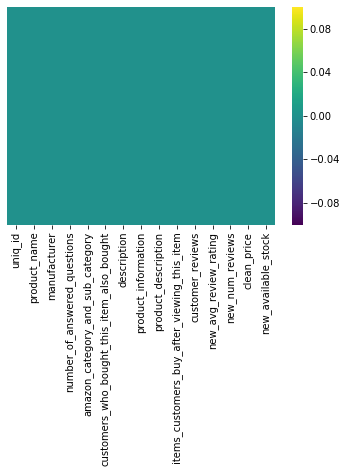

In [156]:
sns.heatmap(ama1.isnull(), yticklabels = False, cmap = 'viridis')

In [157]:
ama1.describe()

,number_of_answered_questions,new_avg_review_rating,new_num_reviews,clean_price,new_available_stock
count,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000
mean,1.832116,4.708280,9.069592,20.269541,7.911757
std,2.422151,0.371964,33.645250,42.966778,7.633491
min,1.000000,2.300000,1.000000,0.010000,1.000000
25%,1.000000,4.500000,1.000000,5.950000,3.000000
50%,1.000000,5.000000,2.000000,12.990000,7.000000
75%,2.000000,5.000000,6.000000,20.280145,7.919947
max,39.000000,5.000000,1399.000000,2439.920000,92.000000


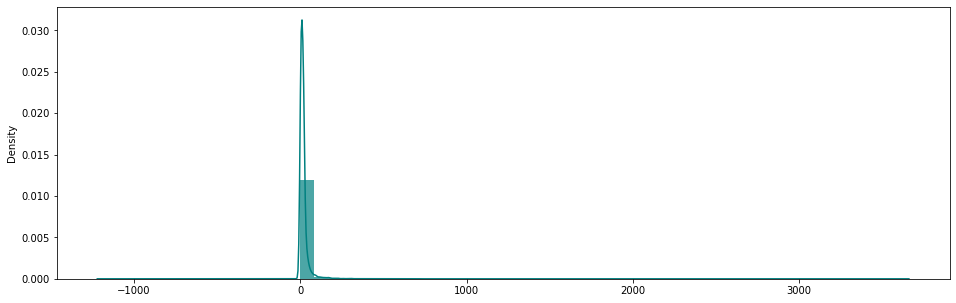

In [158]:
ax = ama1['clean_price'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
ama1['clean_price'].plot(kind = 'density', color = 'teal')
ax.set_label('clean_price')
plt.show()